In [26]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np 

# Device cinfiguration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameter 
num_epochs =4
batch_size =4
learning_rate =0.001

# Dataset has PILImages of range [0,1]
# We transform then to Tensors of normalized range [-1,1] 
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size = batch_size,
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size = batch_size,
                                            shuffle=True)   

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
classes_map = {'0':'plane',
                '1':'car',
                '2':'bird',
                '3':'cat',
                '4':'deer',
                '5':'dog',
                '6':'frog',
                '7':'horse',
                '8':'ship',
                '9':'truck',
                }

Files already downloaded and verified
Files already downloaded and verified


torch.Size([4, 3, 32, 32]) torch.Size([4])


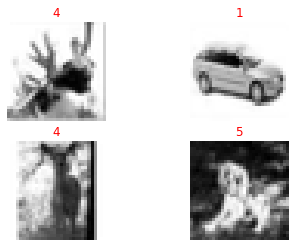

In [35]:
examples = iter(train_loader)
sample,labels = examples.next()
print(sample.shape, labels.shape)
                                    
for i in range(4): 
    plt.subplot(2,2,i+1)
    plt.imshow(sample[i][0],cmap='gray')
    plt.title(str(labels[i].item()),c='r')
    plt.axis('off')
plt.show()

In [36]:

#implement conv net 
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1 =nn.Conv2d(3,6,5)
        self.pool =nn.MaxPool2d(2,2)
        self.conv2 =nn.Conv2d(6,16,5)
        self.fc1 =nn.Linear(16*5*5,120)
        self.fc2 =nn.Linear(120,84)
        self.fc3 =nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader) :
        # original shape: [4, 3, 32 ,32] =4,3,1024
        # input_layer : 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)

        # Backward and optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0 :
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

print('Finished Training')

with torch.no_grad():
    n_corrent = 0 
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # Max returns (value, index)
        _, predicted = torch.max(outputs,1)
        n_samples += labels.size(0)
        n_corrent += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred) :
                n_class_correct[label] += 1
            n_class_samples[label] +=1
        
    acc =100.0 * n_corrent / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of the {classes[i]}: {acc} %')


epoch 1/4, step 100/12500, loss = 2.2629
epoch 1/4, step 200/12500, loss = 2.2868
epoch 1/4, step 300/12500, loss = 2.3022
epoch 1/4, step 400/12500, loss = 2.3382
epoch 1/4, step 500/12500, loss = 2.2441
epoch 1/4, step 600/12500, loss = 2.2944
epoch 1/4, step 700/12500, loss = 2.3388
epoch 1/4, step 800/12500, loss = 2.2607
epoch 1/4, step 900/12500, loss = 2.3061
epoch 1/4, step 1000/12500, loss = 2.3242
epoch 1/4, step 1100/12500, loss = 2.3517
epoch 1/4, step 1200/12500, loss = 2.3119
epoch 1/4, step 1300/12500, loss = 2.3622
epoch 1/4, step 1400/12500, loss = 2.2981
epoch 1/4, step 1500/12500, loss = 2.3077
epoch 1/4, step 1600/12500, loss = 2.3432
epoch 1/4, step 1700/12500, loss = 2.3044
epoch 1/4, step 1800/12500, loss = 2.2759
epoch 1/4, step 1900/12500, loss = 2.3029
epoch 1/4, step 2000/12500, loss = 2.2920
epoch 1/4, step 2100/12500, loss = 2.3086
epoch 1/4, step 2200/12500, loss = 2.2665
epoch 1/4, step 2300/12500, loss = 2.3247
epoch 1/4, step 2400/12500, loss = 2.2919
e